<a href="https://colab.research.google.com/github/TheCoolestMango/Music-Similarity-Analysis/blob/main/Music_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Datasets

[data.csv ](https://drive.google.com/file/d/1VQI5LPI2sQy4ve4hZIKW5xNwr9FocvbR/view?usp=sharing) Contains features for the following ten genres: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae & rock.


[data_2genre.csv](https://drive.google.com/file/d/1mVzSWD6jquPGZ7upMYPp6H0AoxXppcO1/view?usp=sharing) Contains features for two genres classical and pop. In label column 1 corresponds to pop and 2 corresponds to classical.



In [3]:
import numpy as np
import pandas as pd 
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_1 = pd.read_csv('data.csv')
data_2 = pd.read_csv('data_2genre.csv')

data = pd.concat([data_1, data_2])
data['label'] = data['label'].replace(to_replace={1: 'pop', 2: 'classical'})
data['label'].value_counts()

classical    200
pop          200
blues        100
country      100
disco        100
hiphop       100
jazz         100
metal        100
reggae       100
rock         100
Name: label, dtype: int64

#Features Analysis

This part is for checking the relationship between the included features

## Tempo Distribution

Notice how the Disco tempo is distinctly different, with a peak close to 150 BPM. While Classical and Jazz are the most diverse, having less prominent peaks and a wider spread of tempos.

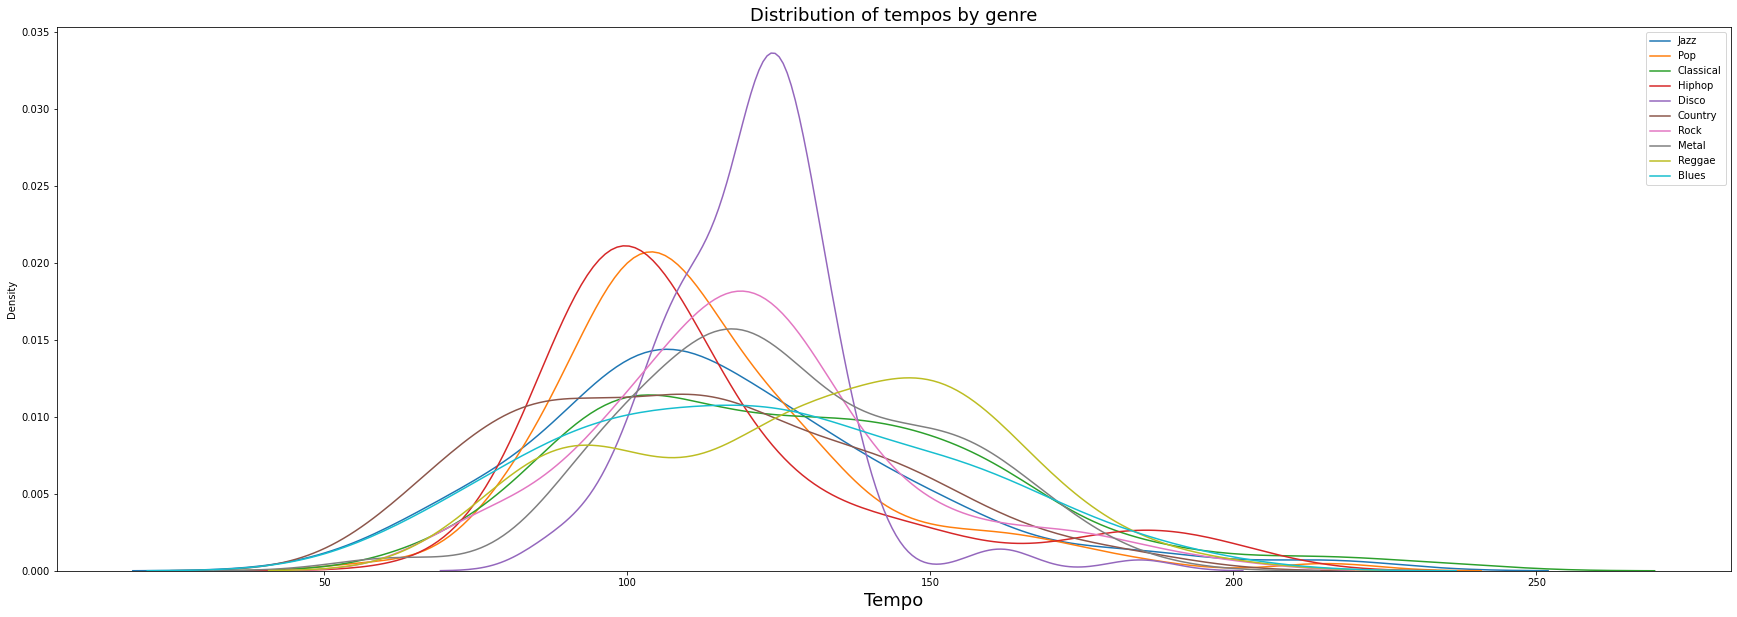

In [5]:
plt.figure(figsize=(30,10))

sns.kdeplot(data=data.loc[data['label']=='jazz', 'tempo'], label="Jazz")
sns.kdeplot(data=data.loc[data['label']=='pop', 'tempo'], label="Pop")
sns.kdeplot(data=data.loc[data['label']=='classical', 'tempo'], label="Classical")
sns.kdeplot(data=data.loc[data['label']=='hiphop', 'tempo'], label="Hiphop")
sns.kdeplot(data=data.loc[data['label']=='disco', 'tempo'], label="Disco")
sns.kdeplot(data=data.loc[data['label']=='country', 'tempo'], label="Country")
sns.kdeplot(data=data.loc[data['label']=='rock', 'tempo'], label="Rock")
sns.kdeplot(data=data.loc[data['label']=='metal', 'tempo'], label="Metal")
sns.kdeplot(data=data.loc[data['label']=='reggae', 'tempo'], label="Reggae")
sns.kdeplot(data=data.loc[data['label']=='blues', 'tempo'], label="Blues")

plt.title("Distribution of tempos by genre", fontsize = 18)

plt.xlabel("Tempo", fontsize = 18)

plt.legend()

### Tempo Mean

The average tempo for all genres are very similar.

Text(0, 0.5, 'Mean Tempo')

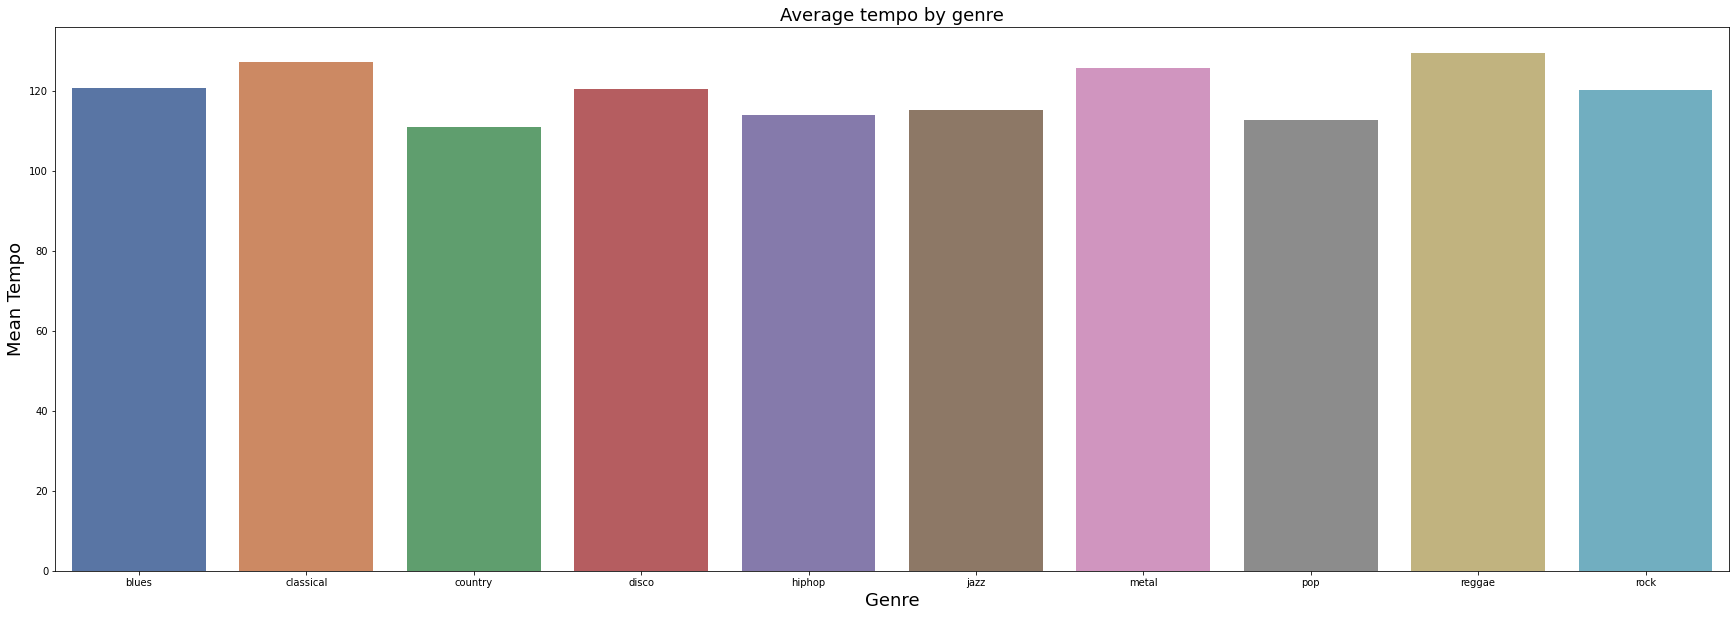

In [6]:
plt.figure(figsize=(30,10))

genres = data['label'].unique()

tempos = [ data[data['label']==x].tempo.mean() for x in genres ]

sns.barplot(x=genres, y=tempos, palette="deep")

plt.title("Average tempo by genre", fontsize = 18)

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean Tempo', fontsize = 18)

## MFCCs Distribution
used mfcc2 (the second coefficient of the Mel-frequency spectrum, a mathematical representation of the sound)

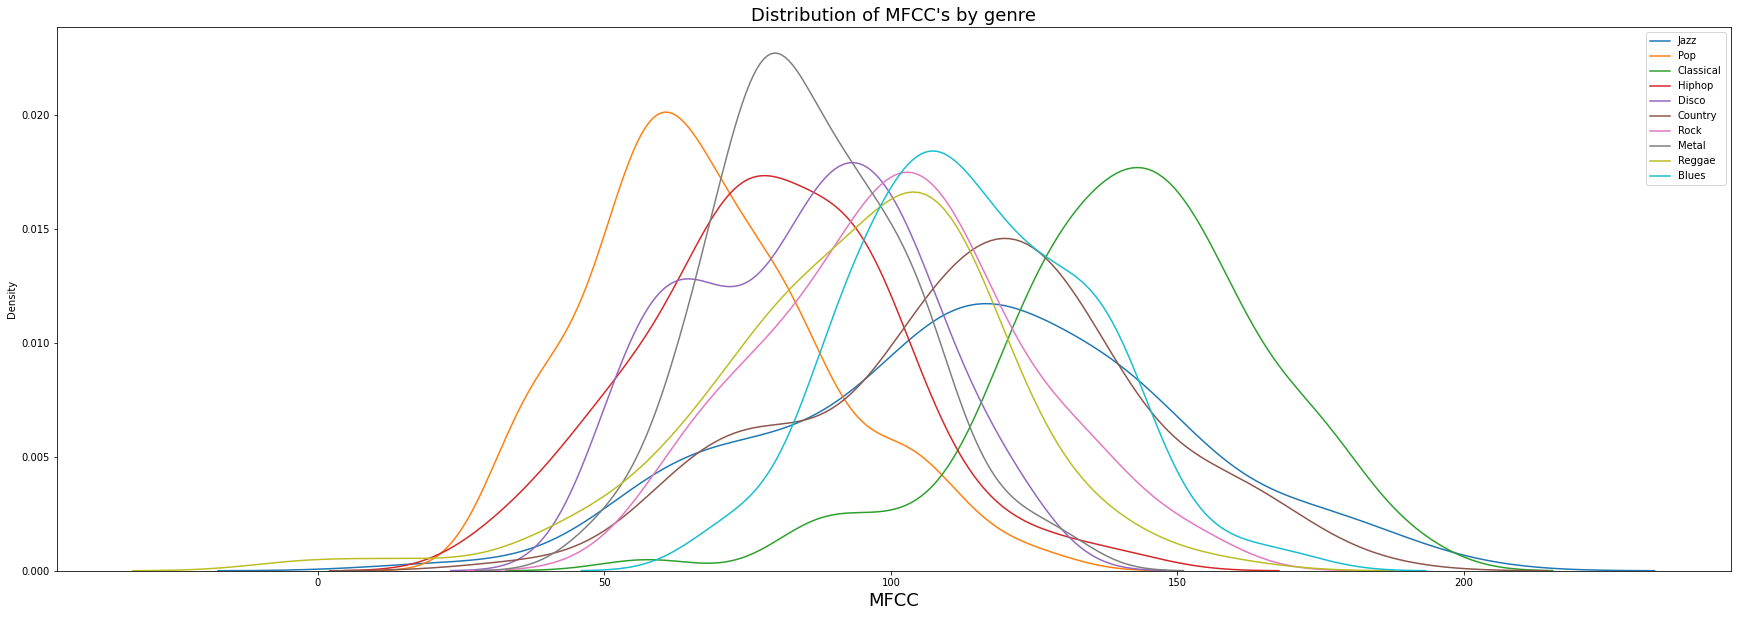

In [7]:
plt.figure(figsize=(30,10))

sns.kdeplot(data=data.loc[data['label']=='jazz', 'mfcc2'], label="Jazz")
sns.kdeplot(data=data.loc[data['label']=='pop', 'mfcc2'], label="Pop")
sns.kdeplot(data=data.loc[data['label']=='classical', 'mfcc2'], label="Classical")
sns.kdeplot(data=data.loc[data['label']=='hiphop', 'mfcc2'], label="Hiphop")
sns.kdeplot(data=data.loc[data['label']=='disco', 'mfcc2'], label="Disco")
sns.kdeplot(data=data.loc[data['label']=='country', 'mfcc2'], label="Country")
sns.kdeplot(data=data.loc[data['label']=='rock', 'mfcc2'], label="Rock")
sns.kdeplot(data=data.loc[data['label']=='metal', 'mfcc2'], label="Metal")
sns.kdeplot(data=data.loc[data['label']=='reggae', 'mfcc2'], label="Reggae")
sns.kdeplot(data=data.loc[data['label']=='blues', 'mfcc2'], label="Blues")

plt.title("Distribution of MFCC's by genre", fontsize = 18)

plt.xlabel("MFCC", fontsize = 18)

plt.legend()

### MFCC Mean

Text(0, 0.5, 'Mean MFCC')

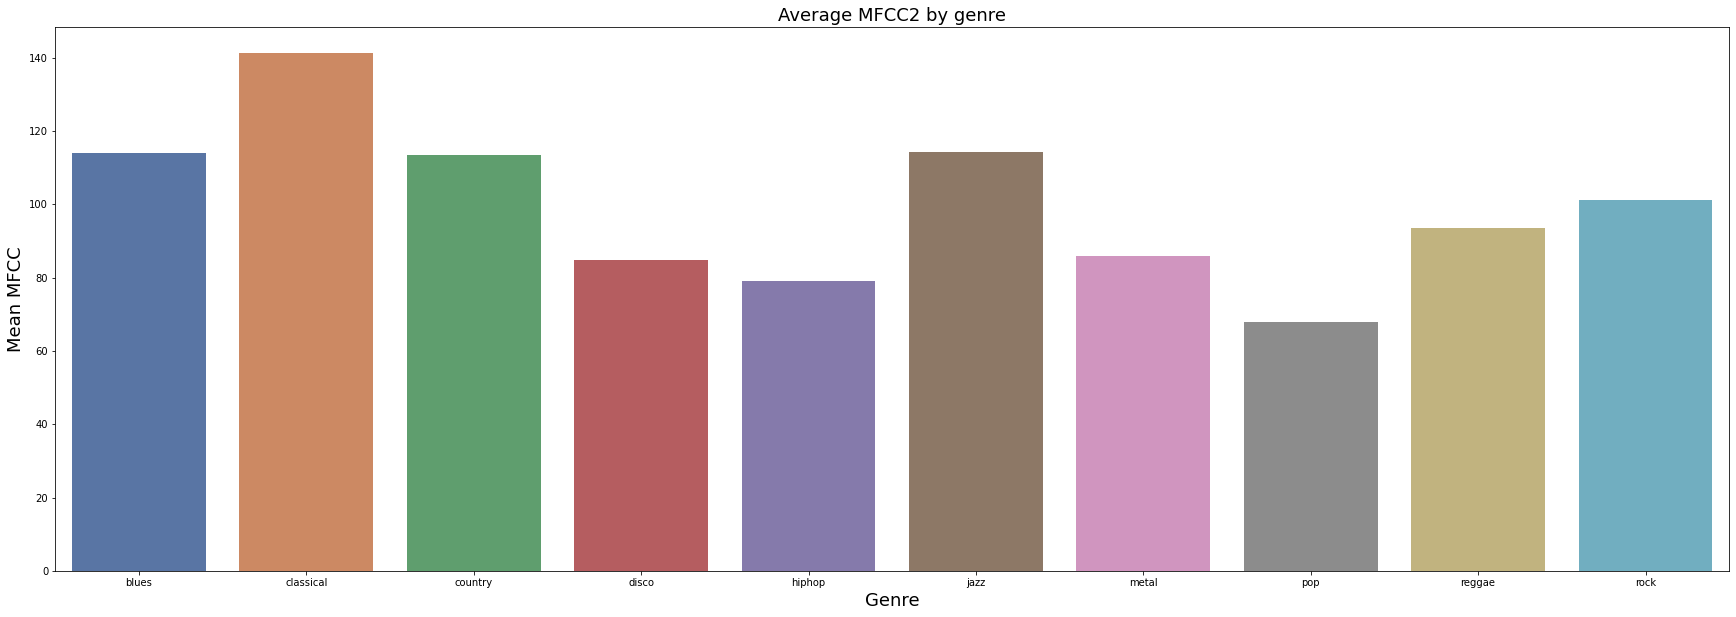

In [16]:
plt.figure(figsize=(30,10))

genres = data['label'].unique()

mfccs = [ data[data['label']==x].mfcc2.mean() for x in genres ]

sns.barplot(x=genres, y=mfccs, palette="deep")

plt.title("Average MFCC2 by genre", fontsize = 18)

plt.xlabel('Genre', fontsize = 18)
plt.ylabel('Mean MFCC', fontsize = 18)

## Feature Correlations
Quantifies how close they are to a perfect linear relationship. This filtered list more clearly shows the features with the strongest positive correlations.
Here we can see that rolloff is strongly correlated with both spectral centroid and spectral bandwidth. We can also see that there is also a strong correlation between spectral bandwidth and centroid.

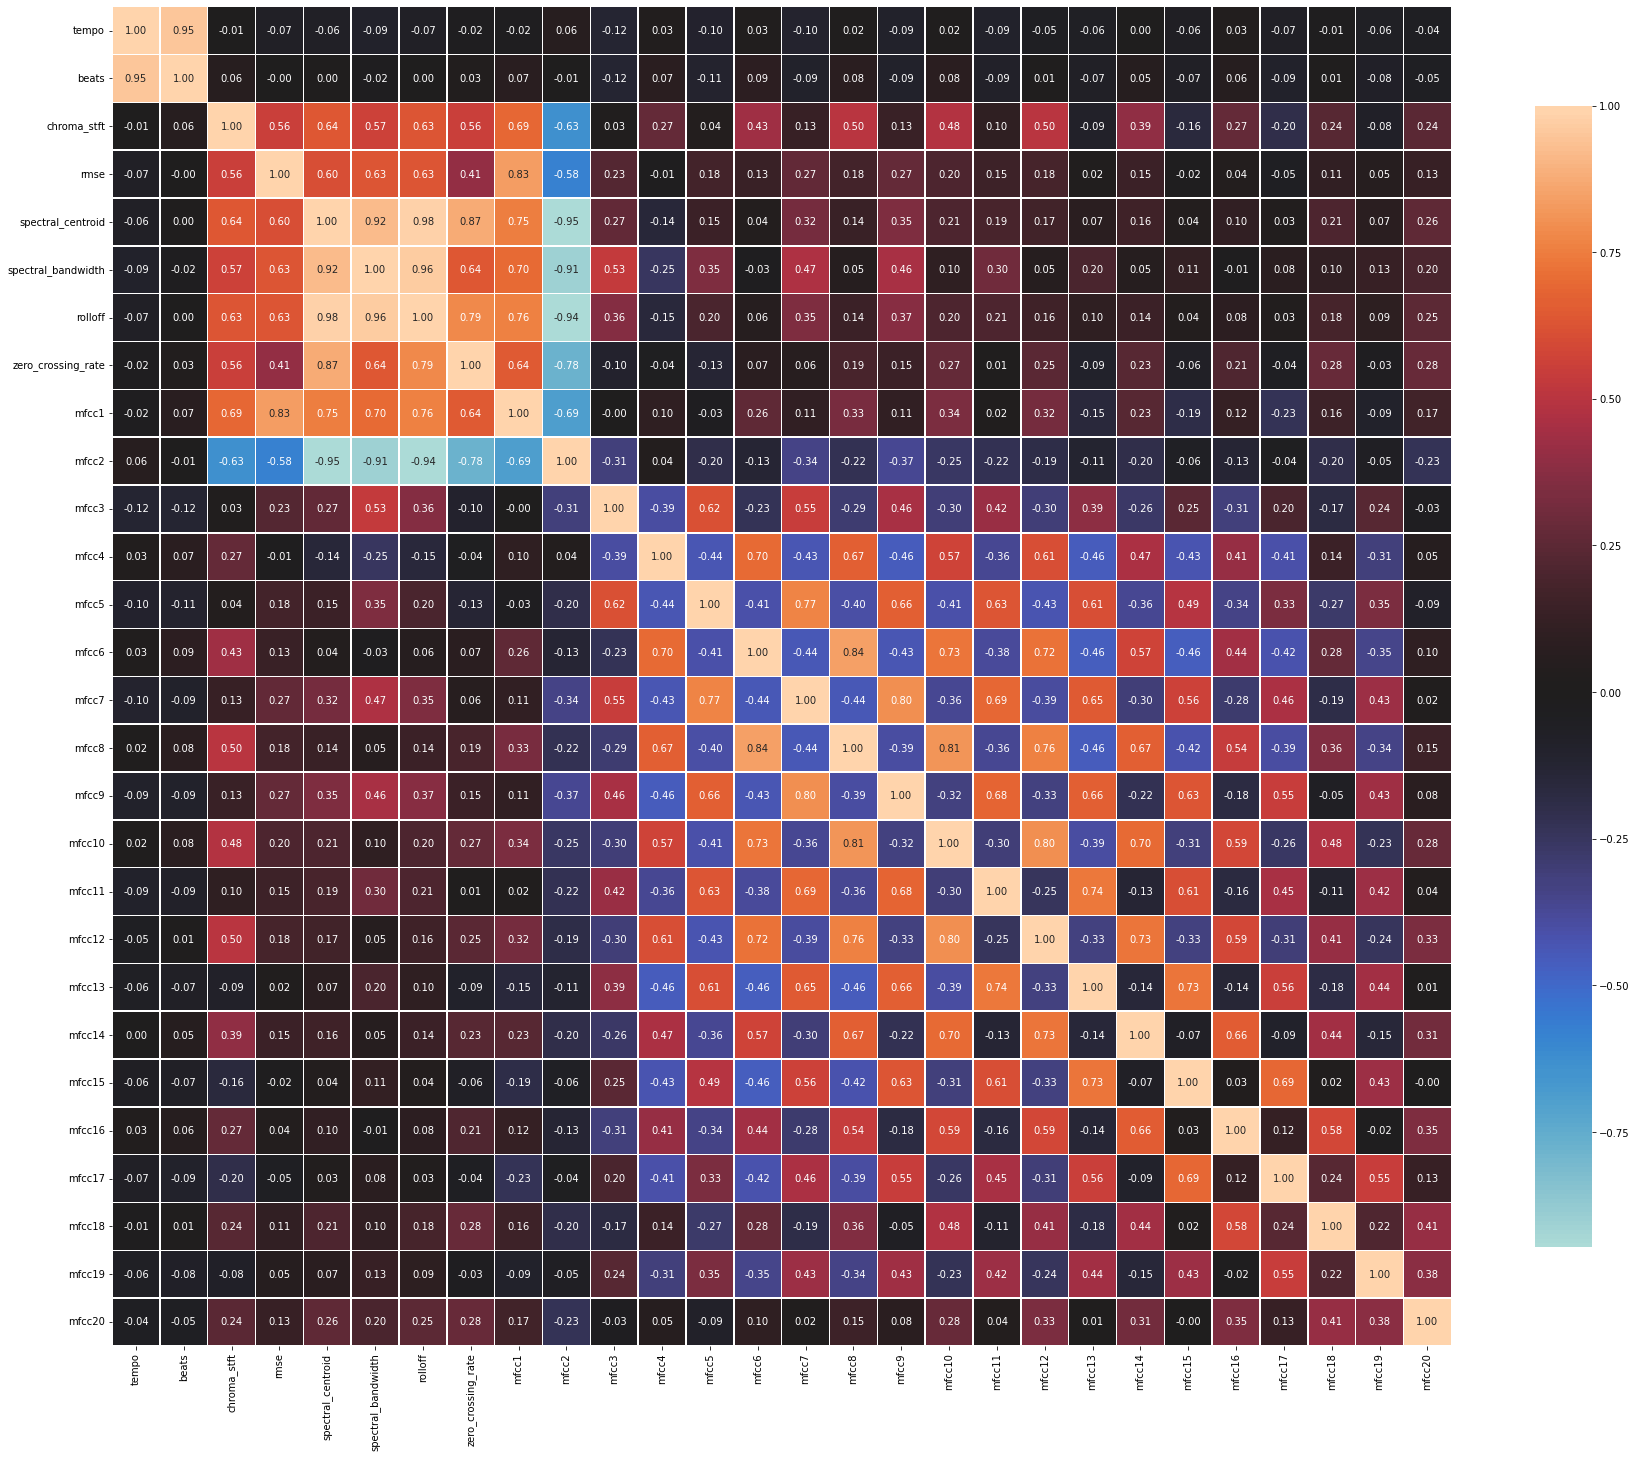

In [8]:
correlations = data.corr()

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [9]:
c = data.corr()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[:10])

spectral_centroid   mfcc2                -0.946137
mfcc2               spectral_centroid    -0.946137
                    rolloff              -0.940227
rolloff             mfcc2                -0.940227
mfcc2               spectral_bandwidth   -0.906566
spectral_bandwidth  mfcc2                -0.906566
zero_crossing_rate  mfcc2                -0.775487
mfcc2               zero_crossing_rate   -0.775487
mfcc1               mfcc2                -0.689646
mfcc2               mfcc1                -0.689646
dtype: float64


## Scatter Plots
These scatter plots effectively visualize the relationships between the highly correlated variables. Notice that some variables have negative, non-linear relationships with mfcc2

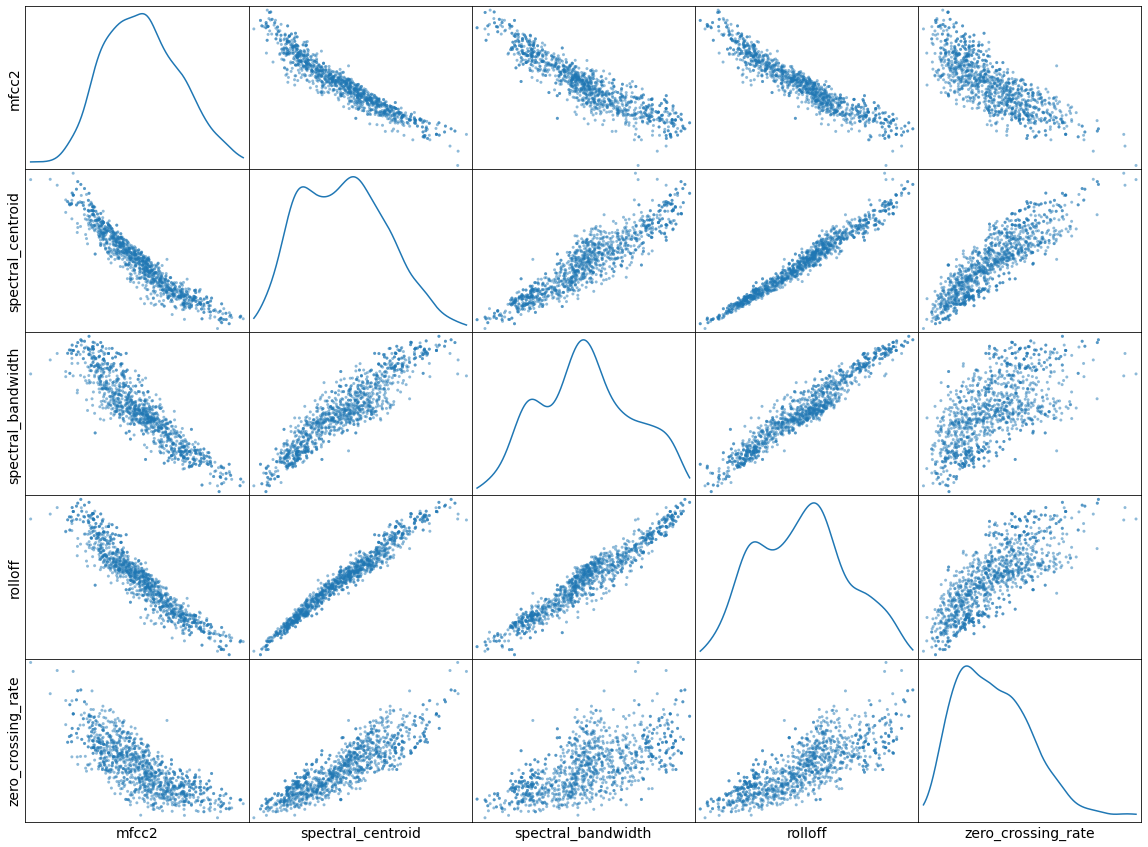

In [10]:
attributes = ["mfcc2", "spectral_centroid",
              "spectral_bandwidth", "rolloff", "zero_crossing_rate" ]
sm = scatter_matrix(data[attributes], figsize=(20, 15), diagonal = "kde");

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)];
[s.set_yticks(()) for s in sm.reshape(-1)];

for x in sm.ravel():
    x.set_xlabel(x.get_xlabel(), fontsize = 14)
    x.set_ylabel(x.get_ylabel(), fontsize = 14)

In [11]:
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV

data = data.drop('filename', axis=1)

X = data.loc[:, data.columns != 'label']
y = data['label']

label_encoder = LabelEncoder().fit(y)
name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
k_fold = KFold(n_splits=5, random_state=0, shuffle=True)

rf_params = { 
    'n_estimators': [ i*10 for i in range(15, 30) ],
    'max_features': ['auto'],
    'n_jobs': [-1],
    'random_state': [0]
}

xgb_params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1],
    'n_jobs': [-1],
    'random_state': [0]
}

rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=k_fold, n_jobs=-1)
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=k_fold, n_jobs=-1)
rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)

rf_params_max = rf_grid.best_params_
xgb_params_max = xgb_grid.best_params_

print("RF accuracy:")
print(rf_grid.score(X_train, y_train))
print("RF params:")
print(rf_params_max)
print("")
print("XGB accuracy:")
print(xgb_grid.score(X_train, y_train))
print("XGB params:")
print(xgb_params_max)
print("")

rf_model = RandomForestClassifier(**rf_params_max)
xgb_model = XGBClassifier(**xgb_params_max)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

print("RF validation accuracy")
print(accuracy_score(y_test, rf_preds))
print("")
print("Random Forest Classification Report: \n" + classification_report(y_test, rf_preds))
print("")

print("XGB validation accuracy:")
print(accuracy_score(y_test, xgb_preds))
print("")
print("XGB Classification Report: \n" + classification_report(y_test, xgb_preds))
print("")

RF accuracy:
0.9989583333333333
RF params:
{'max_features': 'auto', 'n_estimators': 260, 'n_jobs': -1, 'random_state': 0}

XGB accuracy:
0.9989583333333333
XGB params:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 180, 'n_jobs': -1, 'random_state': 0}

RF validation accuracy
0.7458333333333333

Random Forest Classification Report: 
              precision    recall  f1-score   support

       blues       0.75      0.63      0.69        19
   classical       0.92      1.00      0.96        46
     country       0.86      0.50      0.63        24
       disco       0.36      0.40      0.38        20
      hiphop       0.93      0.64      0.76        22
        jazz       0.72      0.68      0.70        19
       metal       0.83      0.87      0.85        23
         pop       0.70      1.00      0.82        35
      reggae       0.70      0.88      0.78        16
        rock       0.45      0.31      0.37        16

    accuracy                           0.75       240
   macr